# **Business case: Understanding profitability in the US financial market**

### Marcela Ibarra Mora A0123197

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **Get and calculate data**
FIRSTLY WE LOAD THE DATA AND CALCULATE DIFERENT VALUES LIKE: MARKETVALUE, BOOKVALUE, EBIT, OPERATING PROFIT MARGIN, NET INCOME AND PROFIT MARGIN. ON THE OTHER HAND WE DO A PROCESS OF CLEANING SOME OF THE DATA WHERE THE VALUES WERE 0 SO THAT WE CAN PERFORM APROPIATE FUNCTIONS CORRECTLY.

In [2]:
#upload data
data = pd.read_csv('us2022q2a.csv')
data

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [3]:
#Get the firm and ticket info
name_columns = ["firm","Name","N","Class","Country of Origin","Type of Asset","Sector NAICS level 1","Exchange / Src","Sector Economatica","Sector NAICS last available","partind"]
df_firms = pd.read_csv('usfirms2022.csv', names = name_columns)
df_firms = df_firms.drop(["N","Class","Country of Origin","Type of Asset","Exchange / Src","Sector Economatica","Sector NAICS last available","partind"], axis=1)
df_firms

,firm,Name,Sector NAICS level 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [4]:
#merge both data frames
data = data.merge(df_firms, how='left', on='firm')

In [5]:
#change the format of the date column 
data['q'] = pd.PeriodIndex(data['q'],freq = "q")

In [6]:
#setting the multindex
data.set_index(['firm','q'],inplace=True)

In [7]:
data ["Market Value"] = data["originalprice"]*data["sharesoutstanding"]

In [8]:
data["Book Value"] = data["totalassets"]-data["totalliabilities"]

In [9]:
data["Ebit"] = data["revenue"] - data["cogs"] - data["sgae"]

In [10]:
data["revenue"] = data["revenue"].replace(0,np.nan)
data["originalprice"] = data["originalprice"].replace(0,np.nan)
data["totalassets"] = data["totalassets"].replace(0,np.nan)

In [11]:
data["Op_profitmargin"] = data["Ebit"]/data["revenue"]  #Porcentaje

In [12]:
data["net_income"] = data["Ebit"] - data["otheropexp"] - data["incometax"] - data["finexp"] + data["extraincome"]

In [13]:
pd.options.display.float_format = "{:,.2f}".format
data["Profit margin"] = (data["net_income"] / data["revenue"])  #Porcentaje

In [14]:
#Divide by industry
data_industry1 = data.loc[(data["Sector NAICS level 1"] == "Wholesale Trade") | (data["Sector NAICS level 1"] == "Retail Trade")]
data_industry2 = data.loc[(data["Sector NAICS level 1"] == "Accommodation and Food Services") | (data["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (data["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (data["Sector NAICS level 1"] == "Educational Services") | (data["Sector NAICS level 1"] == "Health Care and Social Assistance") | (data["Sector NAICS level 1"] == "Information") | (data["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (data["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (data["Sector NAICS level 1"] == "Transportation and Warehousing")]
data_industry3 = data.loc[(data["Sector NAICS level 1"] == "Finance and Insurance") | (data["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
data_industry4 = data.loc[(data["Sector NAICS level 1"] == "Manufacturing")]

## **General questions:**

By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

WE CAN MEASURE THE COMPOSITION OF US PUBLIC FIRMS SIZE BASED ON VALUES LIKE MARKET VALUE AND BOOK VALUE THAT ARE CALCULATED WITH THE HISTORICAL PRICE OF THE STOCKS, LIABILITIES, ASSETS, ETC. IN TERMS OF PROFITABILITY, WE USE VARIABLES LINK THE EARNINGS, SALES, REVENUE, COSTS, INCOME TO CALUCULATE THE PROFIT MARGIN TO MEASURE HOW PROFITABLE THE FIRMS ARE.  

Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

IT DEPENDS ON THE MARKET'S VOLATILITY AND INDUSTRY OF THE FIRM AND FACTORS LIKE THE SALES, REVENUE, COST, INCOMES, ETC. THE STOCK RETURNS DEPEND ON THE HISTORICAL STOCK PRICES, REVENUE, TAXES, OPERATING PROFIT, ETC.

## **Specific questions**

About descriptive statistics 

Considering the most recent financial quarter of the dataset:

Question 1

Show how many firms by industry there are in the sample?

In [15]:
print("Commercial",data_industry1.groupby(["firm"]).sum().shape)
print("Services",data_industry2.groupby(["firm"]).sum().shape)
print("Financial Services",data_industry3.groupby(["firm"]).sum().shape)
print("Manufacturing",data_industry4.groupby(["firm"]).sum().shape)

Commercial (231, 24)
Services (514, 24)
Financial Services (769, 24)
Manufacturing (1565, 24)


COMMERCIAL HAS 231 FIRMS

SERVICES HAS 514 FIRMS

FINANCIAL SERVICES HAS 769 FIRMS

MANUFACTURING HAS 1565 FIRMS

Question 2

For each industry (and for all industries), what can you say about the typical firm size in terms of market value?

In [16]:
#For all industries based on market value
data["Market Value"].median()

1576864.41918

FOR ALL INDUSTRIES, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 1.57 BILLION DOLLARS

How firm size (in market value) is distributed?

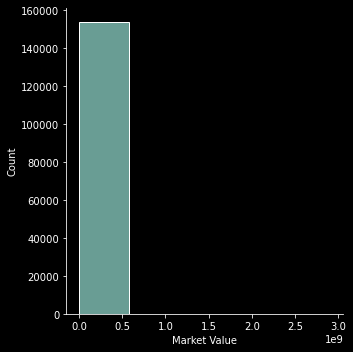

In [17]:
sns.displot(x ='Market Value',bins = 5,data=data)

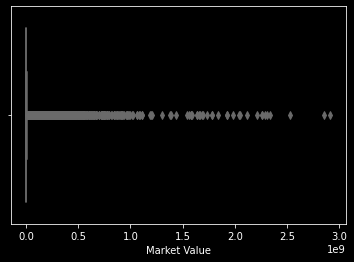

In [18]:
ax = sns.boxplot(x=data["Market Value"])

BASED ON THE HISTOGRAM AND THE BOXPLOT FROM ABOVE WE CAN NOTICE THAT THE DATA DOESN'T HAVE A NORMAL DISTRIBUTION BECAUSE MOST OF THE DATA LEAN ON THE LEFT SIDE OF THE GRAPHS, AROUND THE VALUES OF 0 AND 500,000,000 THOUSAND DOLLARS FOR MARKET VALUES, MEANING THAT MOST FIRMS ARE SMALL COMPARE TO THE AMOUNT OF FIRMS THAT ARE BIGGER

How much Market Value change within each industry?


In [19]:
#For all industries individualy based on market value
print("Commercial",data_industry1["Market Value"].median())
print("Services",data_industry2["Market Value"].median())
print("Financial Services",data_industry3["Market Value"].median())
print("Manufacturing",data_industry4["Market Value"].median())

Commercial 2083817.9707199999
Services 2184463.5194800003
Financial Services 1563695.9379000003
Manufacturing 1190025.10997


FOR THE COMMERCIAL INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 2.08 BILLION DOLLARS

FOR THE SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 2.18 BILLION DOLLARS

FOR THE FINANCIAL SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 1.5 BILLION DOLLARS

FOR THE MANUFACTURING INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 1.19 BILLION DOLLARS

MEANING THE INDUSTRY WITH THE MOST VALUABLE FIRMS IS THE SERVICES INDUSTRY

Text(0.5, 1.0, 'Market Value for Manufacturing')

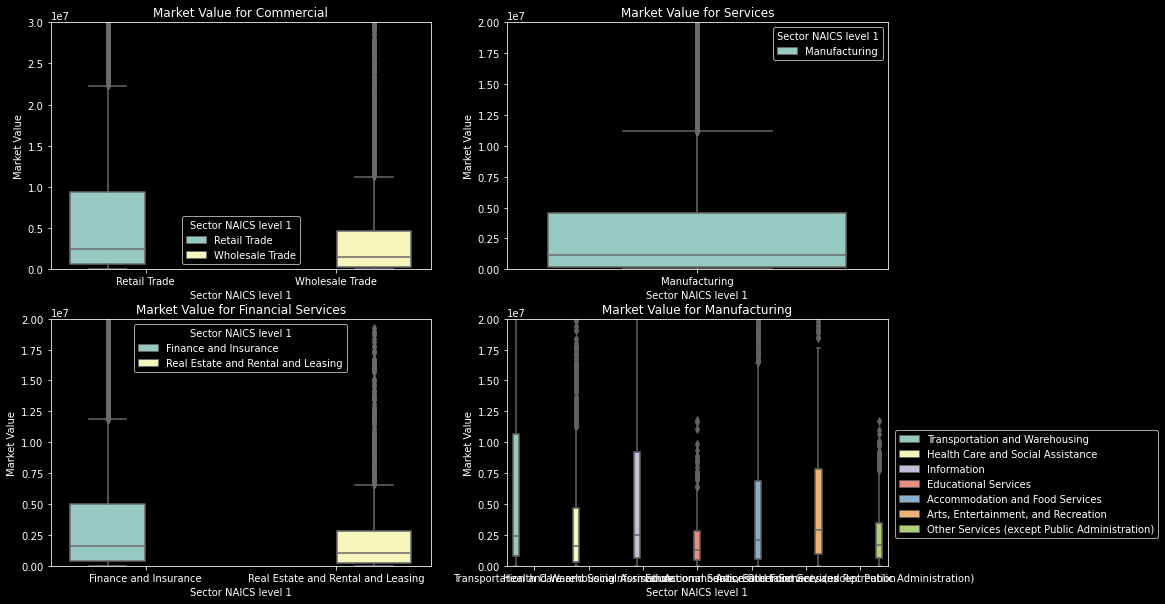

In [20]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry1, hue="Sector NAICS level 1",palette='Set3',ax=ax1)
sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry2, hue="Sector NAICS level 1",palette='Set3',ax=ax4)
sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry3, hue="Sector NAICS level 1",palette='Set3',ax=ax3)
sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry4, hue="Sector NAICS level 1",palette='Set3',ax=ax2)

plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

#for better visualization, we add some limits for the y axis
ax1.set_ylim((0,30000000))
ax2.set_ylim((0,20000000))
ax3.set_ylim((0,20000000))
ax4.set_ylim((0,20000000))


ax1.set_title("Market Value for Commercial")
ax2.set_title("Market Value for Services")
ax3.set_title("Market Value for Financial Services")
ax4.set_title("Market Value for Manufacturing")


Now for Book Value

For each industry (and for all industries), what can you say about the typical firm size in terms of book value?

In [21]:
#For all industries based on
data["Book Value"].median()

568889.0

FOR ALL INDUSTRIES, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 568,889.0 THOUSAND DOLLARS

How much Book Value change within each industry?

In [22]:
print("Commercial",data_industry1["Book Value"].median())
print("Services",data_industry2["Book Value"].median())
print("Financial Services",data_industry3["Book Value"].median())
print("Manufacturing",data_industry4["Book Value"].median())

Commercial 723936.0
Services 544419.0
Financial Services 893833.0
Manufacturing 363070.5


FOR THE COMMERCIAL INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 723,936.0 THOUSAND DOLLARS

FOR THE SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 544,419.0 THOUSAN DOLLARS

FOR THE FINANCIAL SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 893,833.0 THOUSAND DOLLARS

FOR THE MANUFACTURING INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 363,070.5 THOUSAND DOLLARS

MEANING THE INDUSTRY WERE THE FIRMS HAVE A BIGGER VALUE BASED ON THE BOOKS IS THE FINANCIAL SERVICES

Text(0.5, 1.0, 'Book Value for Manufacturing')

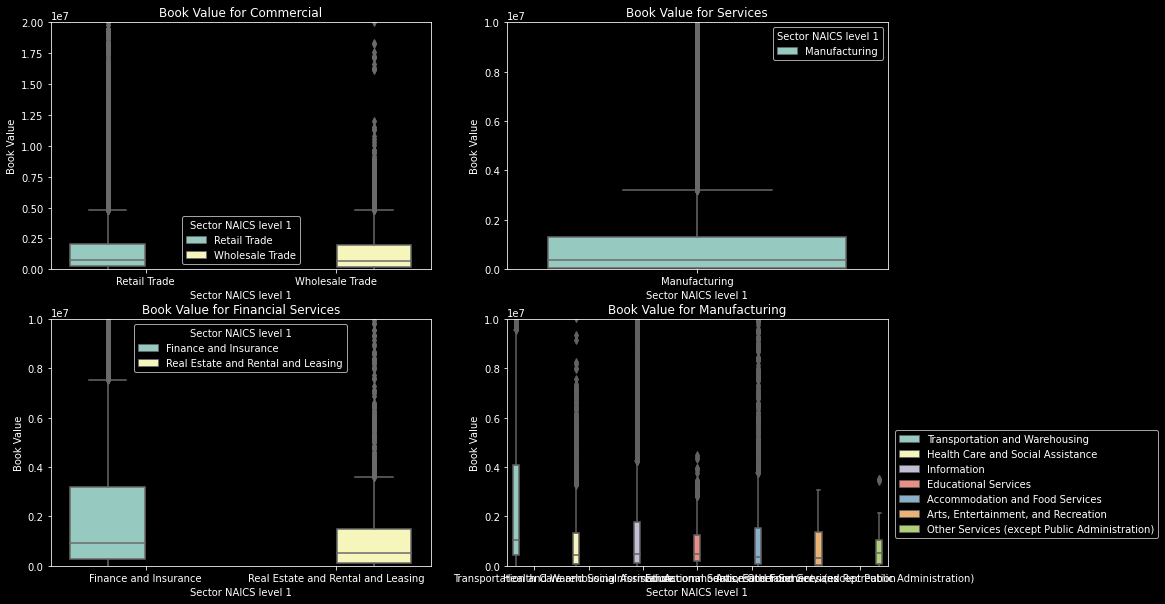

In [23]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


sns.boxplot(x="Sector NAICS level 1",y="Book Value",data=data_industry1, hue="Sector NAICS level 1",palette='Set3',ax=ax1)
sns.boxplot(x="Sector NAICS level 1",y="Book Value",data=data_industry2, hue="Sector NAICS level 1",palette='Set3',ax=ax4)
sns.boxplot(x="Sector NAICS level 1",y="Book Value",data=data_industry3, hue="Sector NAICS level 1",palette='Set3',ax=ax3)
sns.boxplot(x="Sector NAICS level 1",y="Book Value",data=data_industry4, hue="Sector NAICS level 1",palette='Set3',ax=ax2)

plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

#for better visualization we limit the y axis
ax1.set_ylim((0,20000000))
ax2.set_ylim((0,10000000))
ax3.set_ylim((0,10000000))
ax4.set_ylim((0,10000000))


ax1.set_title("Book Value for Commercial")
ax2.set_title("Book Value for Services")
ax3.set_title("Book Value for Financial Services")
ax4.set_title("Book Value for Manufacturing")

Question 3

For each industry (and for all industries), what can you say about profit margin of firms?

Descriptive statistics of profit margin

In [24]:
#For all industries
data["Profit margin"].describe()

count    151,933.00
mean          -7.76
std          392.86
min     -101,403.24
25%           -0.01
50%            0.06
75%            0.14
max       48,191.00
Name: Profit margin, dtype: float64

In [25]:
#for each Industry
data_industry1["Profit margin"].describe()

count   11,545.00
mean        -0.05
std          2.66
min       -254.83
25%          0.01
50%          0.03
75%          0.06
max         33.27
Name: Profit margin, dtype: float64

In [26]:
data_industry2["Profit margin"].describe()

count    20,843.00
mean         -2.69
std         168.47
min     -22,706.00
25%          -0.05
50%           0.04
75%           0.10
max         597.55
Name: Profit margin, dtype: float64

In [27]:
data_industry3["Profit margin"].describe()

count   37,404.00
mean        -0.48
std         60.82
min     -9,805.00
25%          0.06
50%          0.19
75%          0.31
max      1,959.67
Name: Profit margin, dtype: float64

In [28]:
data_industry4["Profit margin"].describe()

count     57,319.00
mean         -17.48
std          598.05
min     -101,403.24
25%           -0.09
50%            0.04
75%            0.10
max       48,191.00
Name: Profit margin, dtype: float64

WE OBTAIN THE PROFIT MARGIN OF A INDUSTRY AND FOR ALL INDUSTRIES TO MEASURE THE INDUSTRY PROFITABILITY USING THE NET INCOME OF ALL INDUSTRIES DIVIDED BY THE REVENUE

WITH THIS DATA, THE TYPICAL PROFITABILITY OF 0.06% FOR ALL INDUSTRIES
THE TYPICAL PROFITABILITY OF 0.03% FOR COMMERCIAL SERVICES 
THE TYPICAL PROFITABILITY OF 0.04% FOR SERVICES FINANCIAL SERVICES
THE TYPICAL PROFITABILITY OF 0.19% FOR FINANCIAL SERVICES
THE TYPICAL PROFITABILITY OF 0.04$ FOR MANUFACTURING

Plot(s) to illustrate how profit margin changes across industries.

In [29]:
lq_profit_ind1=data_industry1["Profit margin"].groupby(["firm"]).last()
lq_profit_ind2=data_industry2["Profit margin"].groupby(["firm"]).last()
lq_profit_ind3=data_industry3["Profit margin"].groupby(["firm"]).last()
lq_profit_ind4=data_industry4["Profit margin"].groupby(["firm"]).last()

Text(0.5, 1.0, 'Profit margin for Manufacturing')

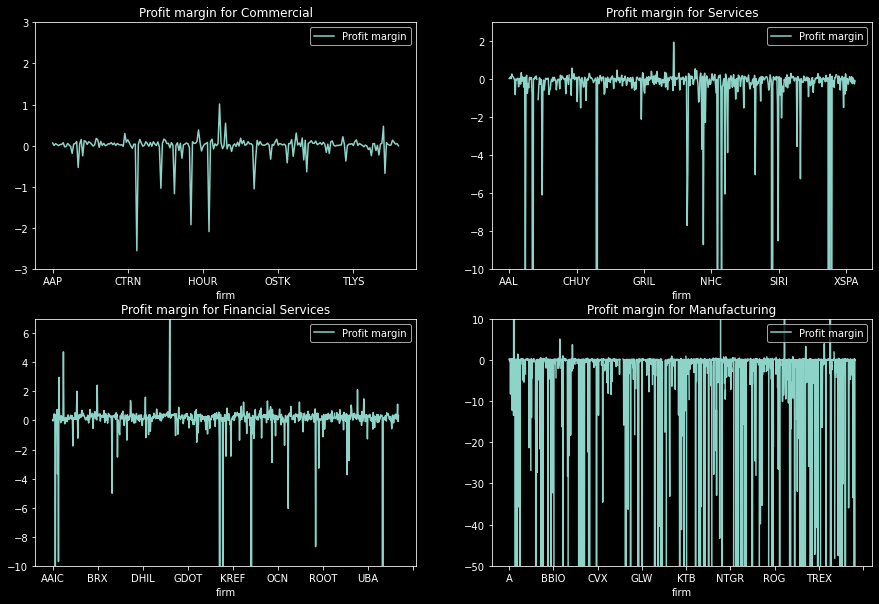

In [30]:
fig = plt.figure(figsize=(15, 10))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

lq_profit_ind1.plot(ax=ax1, legend=True)
lq_profit_ind2.plot(ax=ax2, legend=True)
lq_profit_ind3.plot(ax=ax3, legend=True)
lq_profit_ind4.plot(ax=ax4, legend=True)

ax1.set_ylim((-3,3))
ax2.set_ylim((-10,3))
ax3.set_ylim((-10,7))
ax4.set_ylim((-50,10))

ax1.set_title("Profit margin for Commercial")
ax2.set_title("Profit margin for Services")
ax3.set_title("Profit margin for Financial Services")
ax4.set_title("Profit margin for Manufacturing")

VIEWING THIS PLOT WE CAN MAKE ASSUMPTIONS ABOUT HOW THE PROFITABILITY OF THE INDUSTRIES VARIES OVER TIME AND HOW VOLATILE THE MARKET CAN BE WITHIN EACH INDUSTRY. WE CAN ALSO COMPARE IT TO THE MARKET VALUE FOR EACH INDUSTRY TO SEE HOW THE MARKET CHANGES WITH RESPECT TO THE PROFITABILITY OF THE FIRMS.

Question 4

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [31]:
big_firms = data.groupby(["firm"]).last() 
big_firms_market = big_firms.nlargest(10,"Market Value")
big_firms_market

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,Name,Sector NAICS level 1,Market Value,Book Value,Ebit,Op_profitmargin,net_income,Profit margin
firm,,,,,,,,,,,,,,,,,,,,,
AAPL,"82,959,000.00","47,074,000.00","12,809,000.00",0.00,"-10,000.00",0.00,"3,624,000.00","336,309,000.00","278,202,000.00","24,991,000.00",...,"2,022.00",2.00,Apple Inc,Manufacturing,"2,212,837,946.32","58,107,000.00","23,076,000.00",0.28,"19,442,000.00",0.23
MSFT,"51,865,000.00","16,429,000.00","14,902,000.00",0.00,"-47,000.00",0.00,"3,747,000.00","364,840,000.00","198,298,000.00","2,749,000.00",...,"2,022.00",2.00,Microsoft Corp,Information,"1,920,840,080.06","166,542,000.00","20,534,000.00",0.40,"16,740,000.00",0.32
GOOGL,"69,685,000.00","30,104,000.00","20,128,000.00",0.00,"-439,000.00",0.00,"3,012,000.00","355,185,000.00","99,766,000.00",0.00,...,"2,022.00",2.00,Alphabet Inc,"Professional, Scientific, and Technical Services","1,435,042,441.95","255,419,000.00","19,453,000.00",0.28,"16,002,000.00",0.23
AMZN,"121,234,000.00","66,424,000.00","51,403,000.00","90,000.00","-5,557,000.00","425,000.00","-637,000.00","419,728,000.00","288,326,000.00",0.00,...,"2,022.00",2.00,"Amazon.Com, Inc",Retail Trade,"1,080,624,045.74","131,402,000.00","3,407,000.00",0.03,"-2,028,000.00",-0.02
TSLA,"16,934,000.00","12,700,000.00","1,628,000.00","142,000.00","18,000.00","18,000.00","205,000.00","68,513,000.00","31,276,000.00","1,532,000.00",...,"2,022.00",2.00,"Tesla, Inc",Manufacturing,"697,669,803.69","37,237,000.00","2,606,000.00",0.15,"2,259,000.00",0.13
BRK_A,"76,180,000.00",0.00,"131,662,000.00",0.00,"-379,000.00",0.00,"-12,106,000.00","909,860,000.00","448,631,000.00",NaN,...,"2,022.00",2.00,None,None,"601,513,922.30","461,229,000.00","-55,482,000.00",-0.73,"-43,755,000.00",-0.57
UNH,"80,332,000.00","73,200,000.00",0.00,0.00,"-129,000.00","467,000.00","1,466,000.00","230,172,000.00","153,967,000.00","5,592,000.00",...,"2,022.00",2.00,Unitedhealth Group Inc,Finance and Insurance,"481,873,080.45","76,205,000.00","7,132,000.00",0.09,"5,070,000.00",0.06
JNJ,"24,020,000.00","7,919,000.00","9,929,000.00","85,000.00","-273,000.00","-26,000.00","1,026,000.00","177,724,000.00","101,367,000.00","4,305,000.00",...,"2,022.00",2.00,Johnson & Johnson,Manufacturing,"467,100,134.23","76,357,000.00","6,172,000.00",0.26,"4,814,000.00",0.20
META,"28,822,000.00","5,192,000.00","15,272,000.00",0.00,"-172,000.00",0.00,"1,499,000.00","169,779,000.00","44,012,000.00","1,275,000.00",...,"2,022.00",2.00,"Meta Platforms, Inc","Professional, Scientific, and Technical Services","436,394,646.15","125,767,000.00","8,358,000.00",0.29,"6,687,000.00",0.23


Question 5

Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [32]:
big_firms_book = big_firms.nlargest(10,"Book Value")
big_firms_book

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,Name,Sector NAICS level 1,Market Value,Book Value,Ebit,Op_profitmargin,net_income,Profit margin
firm,,,,,,,,,,,,,,,,,,,,,
BRK_A,"76,180,000.00",0.00,"131,662,000.00",0.00,"-379,000.00",0.00,"-12,106,000.00","909,860,000.00","448,631,000.00",NaN,...,"2,022.00",2.00,None,None,"601,513,922.30","461,229,000.00","-55,482,000.00",-0.73,"-43,755,000.00",-0.57
JPM,"18,646,000.00","3,518,000.00",0.00,0.00,"-4,263,000.00",0.00,"2,216,000.00","3,841,314,000.00","3,555,171,000.00",NaN,...,"2,022.00",2.00,Jpmorgan Chase & Co,Finance and Insurance,"330,236,976.84","286,143,000.00","15,128,000.00",0.81,"8,649,000.00",0.46
BAC,"14,975,000.00","2,531,000.00",0.00,0.00,"-5,552,000.00",0.00,"645,000.00","3,111,606,000.00","2,842,488,000.00",NaN,...,"2,022.00",2.00,Bank Of America Corp,Finance and Insurance,"250,810,716.83","269,118,000.00","12,444,000.00",0.83,"6,247,000.00",0.42
GOOGL,"69,685,000.00","30,104,000.00","20,128,000.00",0.00,"-439,000.00",0.00,"3,012,000.00","355,185,000.00","99,766,000.00",0.00,...,"2,022.00",2.00,Alphabet Inc,"Professional, Scientific, and Technical Services","1,435,042,441.95","255,419,000.00","19,453,000.00",0.28,"16,002,000.00",0.23
C,"15,630,000.00","3,666,000.00",0.00,0.00,"-6,235,000.00",0.00,"1,182,000.00","2,380,904,000.00","2,181,278,000.00",NaN,...,"2,022.00",2.00,Citigroup Inc,Finance and Insurance,"89,069,275.56","199,626,000.00","11,964,000.00",0.77,"4,547,000.00",0.29
XOM,"111,265,000.00","76,299,000.00","6,981,000.00","7,154,000.00","3,572,000.00","194,000.00","6,359,000.00","367,774,000.00","183,266,000.00","7,367,000.00",...,"2,022.00",2.00,Exxon Mobil Corp,Manufacturing,"356,916,372.30","184,508,000.00","27,985,000.00",0.25,"17,850,000.00",0.16
WFC,"11,556,000.00","1,358,000.00",0.00,0.00,"-6,466,000.00",0.00,"613,000.00","1,881,142,000.00","1,701,349,000.00",NaN,...,"2,022.00",2.00,Wells Fargo & Company,Finance and Insurance,"148,468,097.36","179,793,000.00","10,198,000.00",0.88,"3,119,000.00",0.27
MSFT,"51,865,000.00","16,429,000.00","14,902,000.00",0.00,"-47,000.00",0.00,"3,747,000.00","364,840,000.00","198,298,000.00","2,749,000.00",...,"2,022.00",2.00,Microsoft Corp,Information,"1,920,840,080.06","166,542,000.00","20,534,000.00",0.40,"16,740,000.00",0.32
CVX,"68,762,000.00","46,321,000.00","4,563,000.00","1,759,000.00","-80,000.00","129,000.00","4,288,000.00","257,936,000.00","103,374,000.00","3,230,000.00",...,"2,022.00",2.00,Chevron Corp,Manufacturing,"283,397,412.37","154,562,000.00","17,878,000.00",0.26,"11,622,000.00",0.17


## **About statistical modeling**

Selected Industry: Commercial

Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

DEPENDING VARIABLE -> ANNUAL STOCK RETURN 

TO DETERMINE THE INDEPENDENT FACTORS WE WILL BE LOOKING FOR OUTLIERS AND PROBLEMS LIKE MULTICOLLINEARITY 

In [33]:
#Get stock returns (annual)
data["r"] = np.log(data["adjprice"]) - np.log(data["adjprice"].shift(4))
data[["adjprice","r"]]

adjprice     r
firm q                     
A    2000Q1     63.76   NaN
     2000Q2     45.22   NaN
     2000Q3     30.00   NaN
     2000Q4     33.57   NaN
     2001Q1     18.84 -1.22
...               ...   ...
ZYNE 2021Q3      4.24  0.25
     2021Q4      2.88 -0.14
     2022Q1      2.05 -0.82
     2022Q2      1.14 -1.53
NaN  NaN          NaN   NaN

[324447 rows x 2 columns]

In [34]:
data["F1_ret"] = data["r"].shift(-1)
data[["r","F1_ret"]]

r  F1_ret
firm q                   
A    2000Q1   NaN     NaN
     2000Q2   NaN     NaN
     2000Q3   NaN     NaN
     2000Q4   NaN   -1.22
     2001Q1 -1.22   -0.82
...           ...     ...
ZYNE 2021Q3  0.25   -0.14
     2021Q4 -0.14   -0.82
     2022Q1 -0.82   -1.53
     2022Q2 -1.53     NaN
NaN  NaN      NaN     NaN

[324447 rows x 2 columns]

In [35]:
#Earning per share:
data["EPSP"] = (data['net_income'] / data["sharesoutstanding"])/data["originalprice"]

#Sales annual growth
data["SAG"] = (data["revenue"] / (data["revenue"].shift(-4)))-1

#Book to market ratio
data["B_MRatio"] = (data["totalassets"] - data["totalliabilities"]) / (data["originalprice"] * data["sharesoutstanding"])

#Short financial leverage
data["SFL"] = data["shortdebt"] / data["totalassets"]

#Long financial leverage
data["LFL"] = data["longdebt"] / data["totalassets"]

#To classify by size
data.sort_values("Market Value").groupby("q")
data["size"] = pd.cut(data["Market Value"], bins=3, labels = ["small","medium","big"])

d = pd.get_dummies(data["size"],drop_first=-1)
data[["Medium","Big"]] = d[["medium","big"]]
data

revenue         cogs         sgae  otheropexp  extraincome  \
firm q                                                                        
A    2000Q1          NaN          NaN          NaN         NaN          NaN   
     2000Q2 2,485,000.00 1,261,000.00 1,010,000.00        0.00    42,000.00   
     2000Q3 2,670,000.00 1,369,000.00 1,091,000.00        0.00    28,000.00   
     2000Q4 3,372,000.00 1,732,000.00 1,182,000.00        0.00    10,000.00   
     2001Q1 2,841,000.00 1,449,000.00 1,113,000.00        0.00    -6,000.00   
...                  ...          ...          ...         ...          ...   
ZYNE 2021Q3          NaN         0.00    10,210.65        0.00      -376.64   
     2021Q4          NaN         0.00     8,836.44        0.00        16.94   
     2022Q1          NaN         0.00     8,903.92        0.00       317.25   
     2022Q2          NaN         0.00     9,168.77        0.00      -775.93   
NaN  NaN             NaN          NaN          NaN         NaN          NaN   

             finexp  incometax  totalassets  totalliabilities  shortdebt  ...  \
firm q                                                                    ...   
A    2000Q1     NaN        NaN          NaN               NaN        NaN  ...   
     2000Q2    0.00  90,000.00 7,321,000.00      2,679,000.00 512,000.00  ...   
     2000Q3    0.00  83,000.00 7,827,000.00      2,925,000.00 528,000.00  ...   
     2000Q4    0.00 163,000.00 8,425,000.00      3,160,000.00 830,000.00  ...   
     2001Q1    0.00 119,000.00 9,208,000.00      3,667,000.00 556,000.00  ...   
...             ...        ...          ...               ...        ...  ...   
ZYNE 2021Q3   -5.04       0.00    89,996.17         11,309.17     207.63  ...   
     2021Q4   -4.43       0.00    81,171.51         10,258.17     209.07  ...   
     2022Q1  -96.04       0.00    74,381.03          9,214.06     210.51  ...   
     2022Q2  -91.69       0.00    67,006.96          9,765.09     211.97  ...   
NaN  NaN        NaN        NaN          NaN               NaN        NaN  ...   

                r  F1_ret  EPSP  SAG  B_MRatio  SFL  LFL   size Medium Big  
firm q                                                                      
A    2000Q1   NaN     NaN   NaN  NaN       NaN  NaN  NaN  small      0   0  
     2000Q2   NaN     NaN  0.00 0.04      0.14 0.07 0.00  small      0   0  
     2000Q3   NaN     NaN  0.01 0.48      0.22 0.07 0.00  small      0   0  
     2000Q4   NaN   -1.22  0.01 1.03      0.21 0.10 0.00  small      0   0  
     2001Q1 -1.22   -0.82  0.01 0.99      0.39 0.06 0.00  small      0   0  
...           ...     ...   ...  ...       ...  ...  ...    ...    ...  ..  
ZYNE 2021Q3  0.25   -0.14 -0.06  NaN      0.45 0.00 0.00  small      0   0  
     2021Q4 -0.14   -0.82 -0.07  NaN      0.60 0.00 0.00  small      0   0  
     2022Q1 -0.82   -1.53 -0.10  NaN      0.75 0.00 0.00  small      0   0  
     2022Q2 -1.53     NaN -0.20  NaN      1.15 0.00 0.00  small      0   0  
NaN  NaN      NaN     NaN   NaN  NaN       NaN  NaN  NaN    NaN      0   0  

[324447 rows x 36 columns]

In [36]:
data[["EPSP","SAG","B_MRatio","SFL","LFL"]].describe()

,EPSP,SAG,B_MRatio,SFL,LFL
count,"152,191.00","140,397.00","153,167.00","129,675.00","159,592.00"
mean,-1.59,1.41,81.31,0.23,0.23
std,687.01,200.34,"31,298.04",29.91,2.49
min,"-266,755.60","-7,302.00",-287.39,-0.01,0.00
25%,-0.00,-0.16,0.23,0.00,0.02
50%,0.01,-0.06,0.45,0.01,0.16
75%,0.02,0.03,0.76,0.04,0.33
max,"25,873.93","60,514.20","12,248,719.32","8,570.12",501.83



1. Do histograms for each factor/variables and interpret them 

(-50.0, 10.0)

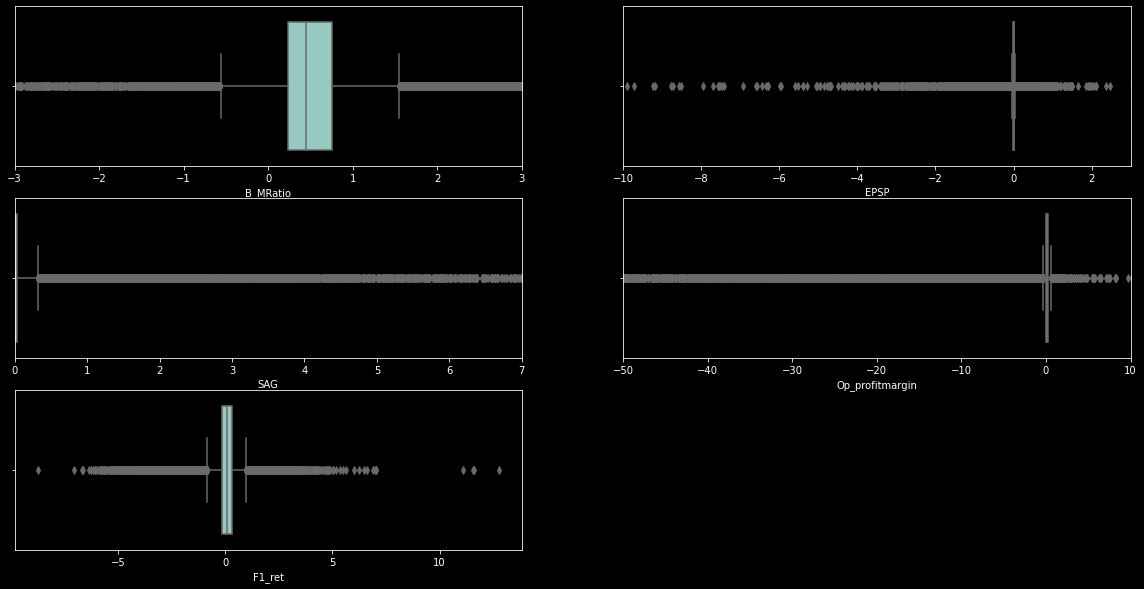

In [37]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

sns.boxplot(x="EPSP",data=data,palette='Set3',ax=ax2)
sns.boxplot(x="SAG",data=data, palette='Set3',ax=ax3)
sns.boxplot(x="Op_profitmargin",data=data, palette='Set3',ax=ax4)
sns.boxplot(x="B_MRatio",data=data,palette='Set3',ax=ax1)
sns.boxplot(x="F1_ret",data=data,palette='Set3',ax=ax5)


ax1.set_xlim((-3,3))
ax2.set_xlim((-10,3))
ax3.set_xlim((0,7))
ax4.set_xlim((-50,10))


WE CAN SEE SOME OF THE VARIABLES THAT MAY AFFECT THE ANNUAL STOCK RETURN, LIKE THE BOOK TO MARKET VALUE THAT COMPARES THE MARKET VALUE OF A COMPANY COMPARE TO ITS ACTUAL WORTH. WE CAN SE THAT WE HAVE A LOT OF FIRMS THAT GO OUTSIDE OF THE NORMAL DISTRIBUTION, MEANING WE HAVE A LOT OF OUTLIERS TO DEAL WITH


2. Do plots to visualize the possible relationship each factor might have with the dependent variable.


In [38]:
data[["F1_ret","Op_profitmargin","SAG","B_MRatio","SFL","LFL","EPSP"]].corr(method='pearson')

,F1_ret,Op_profitmargin,SAG,B_MRatio,SFL,LFL,EPSP
F1_ret,1.00,0.00,0.00,-0.12,-0.01,0.01,0.17
Op_profitmargin,0.00,1.00,0.00,0.00,-0.01,0.01,-0.00
SAG,0.00,0.00,1.00,0.00,0.00,-0.00,-0.00
B_MRatio,-0.12,0.00,0.00,1.00,-0.00,0.00,-0.99
SFL,-0.01,-0.01,0.00,-0.00,1.00,0.03,0.00
LFL,0.01,0.01,-0.00,0.00,0.03,1.00,-0.00
EPSP,0.17,-0.00,-0.00,-0.99,0.00,-0.00,1.00


3. Show descriptive statistics of these factors

In [39]:
data[["F1_ret","SAG","Op_profitmargin","B_MRatio","SFL","LFL","EPSP"]].describe()

,F1_ret,SAG,Op_profitmargin,B_MRatio,SFL,LFL,EPSP
count,"147,326.00","140,397.00","151,934.00","153,167.00","129,675.00","159,592.00","152,191.00"
mean,0.03,1.41,-7.04,81.31,0.23,0.23,-1.59
std,0.59,200.34,374.80,"31,298.04",29.91,2.49,687.01
min,-8.75,"-7,302.00","-101,440.01",-287.39,-0.01,0.00,"-266,755.60"
25%,-0.17,-0.16,0.02,0.23,0.00,0.02,-0.00
50%,0.09,-0.06,0.11,0.45,0.01,0.16,0.01
75%,0.29,0.03,0.25,0.76,0.04,0.33,0.02
max,12.76,"60,514.20","47,854.00","12,248,719.32","8,570.12",501.83,"25,873.93"


Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model ()
1. Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size



2. For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

AS WE SAW IN THE LAST BOXPLOTS WE HAVE A LOT OF OUTLIERS, SO WE APPLIED WINSORIZATION TO DEAL WITH THIS DATA

In [40]:
from scipy.stats.mstats import winsorize

In [41]:
winsorize(data["SAG"], limits=[0.02, 0.57], inplace=True,nan_policy='propagate')
winsorize(data["Op_profitmargin"], limits=[0.05, 0.57], inplace=True,nan_policy='propagate')
winsorize(data["B_MRatio"], limits=[0.02, 0.54], inplace=True,nan_policy='propagate')
winsorize(data["SFL"], limits=[0.02, 0.61], inplace=True,nan_policy='propagate')
winsorize(data["LFL"], limits=[0.02, 0.51], inplace=True,nan_policy='propagate')
winsorize(data["EPSP"], limits=[0.19, 0.7], inplace=True,nan_policy='propagate')
winsorize(data["F1_ret"], limits=[0.03, 0.56], inplace=True,nan_policy='propagate')

masked_array(data=[ 0.91575726,  0.91575726,  0.91575726, ...,
                   -0.77110872,  0.91575726,  0.91575726],
             mask=False,
       fill_value=1e+20)

<AxesSubplot:xlabel='F1_ret'>

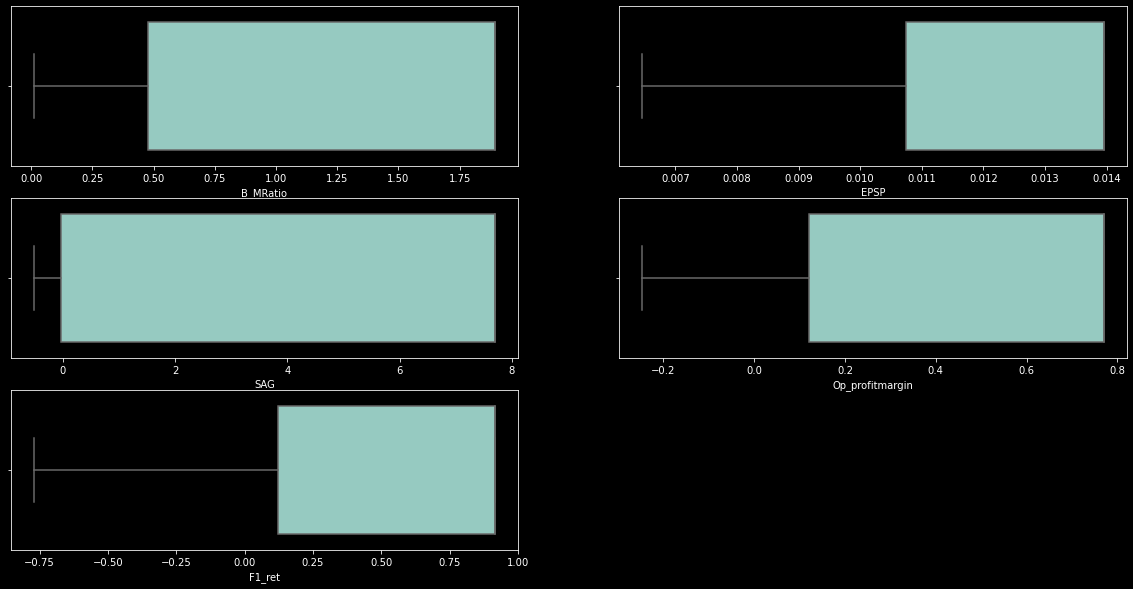

In [42]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

sns.boxplot(x="B_MRatio",data=data,palette='Set3',ax=ax1)
sns.boxplot(x="EPSP",data=data,palette='Set3',ax=ax2)
sns.boxplot(x="SAG",data=data, palette='Set3',ax=ax3)
sns.boxplot(x="Op_profitmargin",data=data,palette='Set3',ax=ax4)
sns.boxplot(x="F1_ret",data=data,palette='Set3',ax=ax5)



WE DON'T HAVE OUTLIERS ANY MORE

In [43]:
data[["F1_ret","SAG","Op_profitmargin","B_MRatio","SFL","LFL","EPSP"]].describe()

,F1_ret,SAG,Op_profitmargin,B_MRatio,SFL,LFL,EPSP
count,"324,447.00","324,447.00","324,447.00","324,447.00","324,447.00","324,447.00","324,447.00"
mean,0.52,4.38,0.48,1.26,0.18,0.78,0.01
std,0.51,3.83,0.36,0.73,0.13,0.58,0.00
min,-0.77,-0.51,-0.25,0.01,0.00,0.00,0.01
25%,0.12,-0.04,0.12,0.47,0.02,0.16,0.01
50%,0.92,7.70,0.77,1.89,0.28,1.33,0.01
75%,0.92,7.70,0.77,1.89,0.28,1.33,0.01
max,0.92,7.70,0.77,1.89,0.28,1.33,0.01



3. You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

In [44]:
#cheking for correlation
data[["F1_ret","SAG","Op_profitmargin","B_MRatio","SFL","LFL","EPSP"]].corr(method='pearson')

,F1_ret,SAG,Op_profitmargin,B_MRatio,SFL,LFL,EPSP
F1_ret,1.00,0.67,0.65,0.68,0.60,0.73,0.54
SAG,0.67,1.00,0.77,0.77,0.68,0.84,0.49
Op_profitmargin,0.65,0.77,1.00,0.75,0.80,0.77,0.65
B_MRatio,0.68,0.77,0.75,1.00,0.77,0.83,0.62
SFL,0.60,0.68,0.80,0.77,1.00,0.76,0.58
LFL,0.73,0.84,0.77,0.83,0.76,1.00,0.58
EPSP,0.54,0.49,0.65,0.62,0.58,0.58,1.00


In [45]:
#Import vif function
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
x = data[["SAG","Op_profitmargin","B_MRatio","SFL","LFL","EPSP","Medium","Big"]]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns



vif_data["VIF"] = [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif_data

,feature,VIF
0,SAG,9.67
1,Op_profitmargin,11.48
2,B_MRatio,16.69
3,SFL,10.89
4,LFL,14.38
5,EPSP,6.76
6,Medium,1.00
7,Big,1.00


WE CAN NOTICE THAT MOST OF THE POSSIBLE INDEPENDENT VARIABLES HAVE A VIF > 10, SO WE CHOSE THE ONES WITH THE SMALLER VALUES OF VIF:

INDEPENDENT VARIBALES:
    - SAG
    - OP_PROFITMARGIN
    -SFL
    -EPSP
    -MEDIUM
    -BIG

In [47]:
import statsmodels.formula.api as sm
result = sm.ols(formula="F1_ret ~ SAG + Op_profitmargin + SFL + EPSP + Medium + Big", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 F1_ret   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 5.962e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:01:52   Log-Likelihood:            -1.2011e+05
No. Observations:              324447   AIC:                         2.402e+05
Df Residuals:                  324440   BIC:                         2.403e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2872      0.003   -1

**INTERPRETATION**

REGRESSION EQ FOR EACH CATEGORICAL GROUP:
1) SMALL
    E[F1_R] = -0.2872 + 0.0541  (SAG) + 0.1210(Op_profitmargin) + 0.5737(SFL) + 33.9487(EPSP)

2) MEDIUM
    E[F1_R] = -0.1504 + 0.0541(SAG) + 0.1210(Op_profitmargin) + 0.5737(SFL) + 33.9487(EPSP)

3) BIG
    E[F1_R] = -0.3044 + 0.0541(SAG) + 0.1210(Op_profitmargin) + 0.5737(SFL) + 33.9487(EPSP)

AFTER CONSIDERING THE EFFECTS ON FIRM SIZE, THE OPERATING PROFIT MARGIN, THE EARNING PER SHARE DEFLATED BY PRICE, AND SHORT FINANCIAL LEVERAGE, THE EFFECT OF SALES ANNUAL GROWTH ON THE ANNUAL STOCK RETURN IS POSITIVE AND SIGNIFICANT. WE CAN NOTICE THAT FOR EVERY POSITIVE CHANGE IN SAG, THE ANNUAL STOCK RETURN CHANGES BY ABOUT THE 5.4%   

AFTER CONSIDERING THE EFFECTS ON FIRM SIZE, SALES ANNUAL GROWTH, THE EARNING PER SHARE DEFLATED BY PRICE, AND SHORT FINANCIAL LEVERAGE, THE EFFECT OF OP. PROFIT MARGIN ON THE ANNUAL STOCK RETURN IS POSITIVE AND SIGNIFICANT. WE CAN NOTICE THAT FOR EVERY POSITIVE CHANGE OF THE OP. PROFIT MARGIN, THE ANNUAL STOCK RETURN CHANGES ABOUT THE 12.10%

AFTER CONSIDERING THE EFFECTS ON FIRM SIZE, OP. PROFIT MARGIN, THE EARNING PER SHARE DEFLATED BY PRICE AND SALES ANNUAL GROWTH, AND THE EFFECT OF SHORT FINANCIAL LEVERAGE ON THE ANNUAL STOCK RETURN IS POSITIVE AND SIGNIFICANT. WE CAN NOTICE THAT FOR EVERY POSITIVE CHANGE OF THE SHORT FINANCIAL LEVERAGE, THE ANNUAL STOCK RETURN CHANGES BY ABOUT THE 12.10%

AFTER CONSIDERING THE EFFECTS ON FIRM SIZE, SALES ANNUAL GROWTH, OP. PROFIT MARGIN, SHORT FINANCIAL LEVERAGE, AND THE EFFECT OF THE EARNING PER SHARE DEFLATED BY PRICE ON THE ANNUAL STOCK RETURN IS POSITIVE AND SIGNIFICANT. WE CAN NOTICE THAT FOR EVERY POSITIVE CHANGE IN EARNING PER SHARE DEFLATED BY PRICE, THE ANNUAL STOCK RETURN CHANGES BY ABOUT THE 33948.7%

BY EVALUATING THE CONSEQUENCES OF THE ALTERATION OF ALL THE VARIABLES IN THE MODEL, WE CAN SE THAT THE MEDIUM SIZE FIRMS HAVE A 13.6% BIGGER FUTURE RETURN IN COMPARISON TO THE SMALL GROUP(BASE GROUP)

BY EVALUATING THE CONSEQUENCES OF THE ALTERATION OF ALL THE VARIABLES IN THE MODEL, WE CAN SE THAT THE BIG SIZE FIRMS HAVE A 1.72% SMALLER FUTURE RETURN IN COMPARISON TO THE SMALL GROUP(BASE GROUP)

ALSO, WE HAVE A R^2 OF 0.5, WHICH IS POSITIVE AND SIGNIFICANT, MEANING THE MODEL IS 0.5 STANDARD DEVIATIONS APART FROM 0 AND THAT THE MODEL IS ABLE TO PREDICT THE ANNUAL STOCK RETURN ACCURATELY 